![ieseg logo](./img/ieseg.png)

#### MBD 2019-2020
# Statistical & Machine Learning Approaches for Marketing

## Section 1: Introduction & Linear Regression

**1. Import all required libraries and datasets**

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

R.version.string

Warning message:
"package 'mlr' was built under R version 3.6.2"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.6.2"'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).
Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2

Attaching package: 'caret'

The following object is masked from 'package:mlr':

    train

Warning message:
"package 'ISLR' was built under R version 3.6.2"Warning message:
"package 'MASS' was built under R version 3.6.2"

[1] "R version 3.6.1 (2019-07-05)"

In [2]:
# Install missing packages
# install.packages("ISLR")

In [2]:
# Import Advertising data
adv <- read.csv('./data/Advertising.csv', row.names=1)
head(adv)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


**Exercise 1:** Calculate B0, B1 for Sales ~ f(TV)

In [42]:
mean_x <- mean(adv[, "TV"])
mean_y <- mean(adv[, "sales"])

a <- 0
b <- 0
for (i in 1:dim(adv)[1]) {
    a <- a + (adv[i, "TV"]-mean_x)*(adv[i, "sales"]-mean_y)
    b <- b + (adv[i, "TV"]-mean_x)^2
}
B1 <- a/b
B0 <- mean_y-B1*mean_x

print(paste("B0=", B0, "B1=", B1))

[1] "B0= 7.0325935491277 B1= 0.0475366404330197"


In [13]:
# Check B0, B1 by lm function
md <- lm(sales ~ TV, data=adv)
summary(md)


Call:
lm(formula = sales ~ TV, data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


**Exercise 2:** Calculate B0, B1 for Sales ~ f(Radio)

In [44]:
mean_x <- mean(adv[, "radio"])
mean_y <- mean(adv[, "sales"])

a <- 0
b <- 0
for (i in 1:dim(adv)[1]) {
    a <- a + (adv[i, "radio"]-mean_x)*(adv[i, "sales"]-mean_y)
    b <- b + (adv[i, "radio"]-mean_x)^2
}
B1 <- a/b
B0 <- mean_y-B1*mean_x

print(paste("B0=", B0, "B1=", B1))

[1] "B0= 9.31163809515829 B1= 0.20249578339244"


In [126]:
# Check B0, B1 by lm function
summary(lm(sales ~ radio, data=adv))


Call:
lm(formula = sales ~ radio, data = adv)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


**Exercise 3:** Calculate the 95% confidence interval of B0, B1 for model Sales ~ f(TV)?

In [40]:
# B0 and B1 from exercise 1
B1 <- 7.032594
B0 <- 0.047537

#calculate RSS
RSS <- 0
a <- mean(adv$TV)
b <- 0

for (i in 1:dim(adv)[1]) {
    RSS <- RSS + (adv[i, "sales"]-B0-B1*adv[i, "TV"])^2
    b <- b + (adv[i, "TV"]-a)^2
}

#calculate RSE
RSE <- sqrt(RSS/(dim(adv)[1]-2))

#calculate SE 
SE_B1 <- sqrt(RSE/b)
SE_B0 <- sqrt(RSE*((1/nrow(adv)) + (a^2)/b))

# calculate the 95% confidence interval of B0, B1
 B1_upper <- B1 + 2*SE_B1
 B1_lower <- B1 - 2*SE_B1

 B0_upper <- B0 + 2*SE_B0
 B0_lower <- B0 - 2*SE_B0

 B1 <- c(B1_upper, B1_lower)
 B0 <- c(B0_upper, B0_lower)

 print(B1)
 print(B0)

[1] 7.089525 6.975663
[1]  9.735077 -9.640003
[1] "B1 =7.08952479877717" "B1 =6.97566320122283"


In [24]:
# Double check with the lm function
md <- lm(sales ~ TV, data=adv)
summary(md)


Call:
lm(formula = sales ~ TV, data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


**Exercise 4:** Calculate the t-statistic and p-value for predictors radio and newspaper.

Calculate t-statistic for Sales ~ f(Radio)

In [146]:
# Show the model of Sales ~ f(Radio)
md <- lm(sales ~ radio, data=adv)
summary(md)


Call:
lm(formula = sales ~ radio, data = adv)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [39]:
# result from exercise 2
 B1 <- 0.20250
 B0 <- 9.31164

#calculate RSS
RSS <- 0
a <- mean(adv$radio)
b <- 0

for (i in 1:dim(adv)[1]) {
    RSS <- RSS + (adv[i, "sales"]-B0-B1*adv[i, "radio"])^2
    b <- b + (adv[i, "radio"]-a)^2
}

#calculate RSE
RSE <- sqrt(RSS/(nrow(adv)-2))

#calculate SE 
SE_B1 <- sqrt(RSE/b)

#calculate t
t <- B1/SE_B1
print(paste0("t =", t))

[1] "t =20.5125408657456"


Calculate t-statistic for Sales ~ f(Newspaper)

In [142]:
# Show the model of Sales ~ f(Newspaper)
md <- lm(sales ~ newspaper, data=adv)
summary(md)


Call:
lm(formula = sales ~ newspaper, data = adv)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


In [41]:
# calculate B0 and B1
mean_x <- mean(adv$newspaper)
mean_y <- mean(adv$sales)

a <- 0
b <- 0
for (i in 1:dim(adv)[1]) {
    a <- a + (adv[i, "newspaper"]-mean_x)*(adv[i, "sales"]-mean_y)
    b <- b + (adv[i, "newspaper"]-mean_x)^2
}
B1 <- a/b
B0 <- mean_y-B1*mean_x

#calculate RSS
RSS <- 0
c <- 0

for (i in 1:dim(adv)[1]) {
    RSS <- RSS + (adv[i, "sales"]-B0-B1*adv[i, "newspaper"])^2
    c <- c + (adv[i, "newspaper"]-mean_x)^2
}

#calculate RSE
RSE <- sqrt(RSS/(nrow(adv)-2))

#calculate SE 
SE_B1 <- sqrt(RSE/c)

#calculate t
t <- B1/SE_B1
print(paste0("t = ", t))

[1] "t = 7.4460295988044"


**Exercise 5:** Calculate the RSE and R-squared for predictors radio and newspaper.

Calculate the RSE and R-squared for Sales ~ f(Radio)

In [145]:
# Show the model of Sales ~ f(Radio)
md <- lm(sales ~ radio, data=adv)
summary(md)


Call:
lm(formula = sales ~ radio, data = adv)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [42]:
#calculate B0, B1
mean_x <- mean(adv$radio)
mean_y <- mean(adv$sales)

a <- 0
b <- 0
for (i in 1:dim(adv)[1]) {
    a <- a + (adv[i, "radio"]-mean_x)*(adv[i, "sales"]-mean_y)
    b <- b + (adv[i, "radio"]-mean_x)^2
}
B1 <- a/b
B0 <- mean_y-B1*mean_x

#calculate RSS
RSS <- 0
TSS <- 0
for (i in 1:dim(adv)[1]) {
    RSS <- RSS + (adv[i, "sales"]-B0-B1*adv[i, "radio"])^2
    TSS <- TSS + (adv[i, "sales"]-mean_y)^2
}

#calculate RSE
RSE <- sqrt(RSS/(nrow(adv)-2))
print(paste0("RSE = ", RSE))

#calculate the R square
R2 <- 1-(RSS/TSS)
print(paste0("R squared = ", R2))

[1] "RSE = 4.27494435490106"
[1] "R squared = 0.332032455445295"


Calculate the RSE and R-squared for Sales ~ f(Newspaper)

In [161]:
# Show the model of Sales ~ f(Newspaper)
md <- lm(sales ~ newspaper, data=adv)
summary(md)


Call:
lm(formula = sales ~ newspaper, data = adv)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


In [43]:
#calculate B0, B1
mean_x <- mean(adv$newspaper)
mean_y <- mean(adv$sales)

a <- 0
b <- 0
for (i in 1:dim(adv)[1]) {
    a <- a + (adv[i, "newspaper"]-mean_x)*(adv[i, "sales"]-mean_y)
    b <- b + (adv[i, "newspaper"]-mean_x)^2
}
B1 <- a/b
B0 <- mean_y-B1*mean_x

#calculate RSS
RSS <- 0
TSS <- 0
for (i in 1:dim(adv)[1]) {
    RSS <- RSS + (adv[i, "sales"]-B0-B1*adv[i, "newspaper"])^2
    TSS <- TSS + (adv[i, "sales"]-mean_y)^2
}

#calculate RSE
RSE <- sqrt(RSS/(nrow(adv)-2))
print(paste0("RSE = ", RSE))

#calculate the R square
R2 <- 1-(RSS/TSS)
print(paste0("R squared = ", R2))

[1] "RSE = 5.09248036652019"
[1] "R squared = 0.0521204454443045"


**4. Multiple Linear Regression**

In [163]:
# Import Advertising data
adv <- read.csv('./data/Advertising.csv', row.names=1)
head(adv)
str(adv)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


'data.frame':	200 obs. of  4 variables:
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ sales    : num  22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


**Exercise 6:** Use the matrix formula to estimate the parameters of multilinear regression model.

In [10]:
# create matrix
library(dplyr)
x <- adv %>%
    select(TV, radio, newspaper)

y <- adv %>% 
    select(sales)

x <- as.matrix(x)
y <- as.matrix(y)

# calculate B

b <- ((t(x)%*%x)^(-1))%*%t(x)%*%y
b

,sales
TV,0.2882298
radio,1.7287568
newspaper,1.2968428


In [110]:
# Compare with the function of R
md <- lm(sales ~ ., data=adv)
summary(md)


Call:
lm(formula = sales ~ ., data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
radio        0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


## Exercise 2

**Chapter 2** : Excercise 2

**a)** regression; inference; n=500, p=4  
**b)** classification; prediction; n=20, p=14  
**c)** regression; prediction; n=53, p=4  

**Chapter 2** : Excercise 10

In [15]:
library(MASS)
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [13]:
dim(Boston)

[1] 506  14

In [14]:
colnames(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

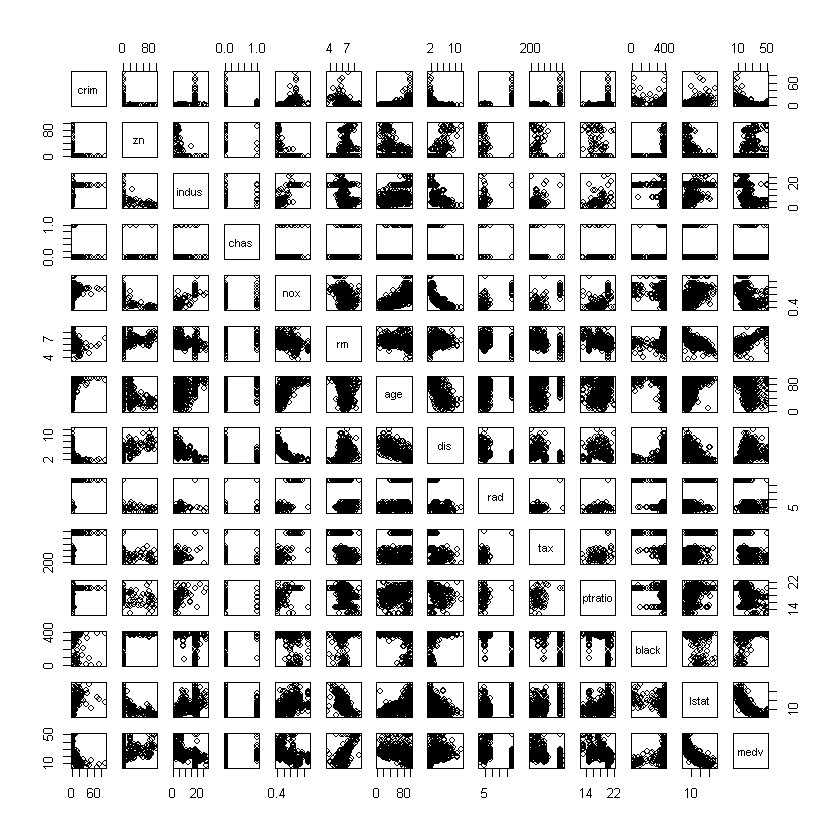

In [17]:
pairs(Boston)

**Chapter 3** : Excercise 3

**a**  
i) False.  
ii) True.  
iii) False.  
iv) True.  
**c**  
False.

In [18]:
y <- 50 + 4*20 + 0.07*110 + 35*1
y

[1] 172.7

**Chapter 3** : Excercise 10

In [19]:
library(ISLR)
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [22]:
lm.fit=lm(Sales ~ Price + Urban + US, data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


**Chapter 3** : Excercise 15

In [24]:
fix(Boston)
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [27]:
lm_1.fit=lm(medv ~ crim, data=Boston)
summary(lm_1.fit)


Call:
lm(formula = medv ~ crim, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.957  -5.449  -2.007   2.512  29.800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.03311    0.40914   58.74   <2e-16 ***
crim        -0.41519    0.04389   -9.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.484 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16


In [28]:
lm_2.fit=lm(medv ~ zn, data=Boston)
summary(lm_2.fit)


Call:
lm(formula = medv ~ zn, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.918  -5.518  -1.006   2.757  29.082 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.91758    0.42474  49.248   <2e-16 ***
zn           0.14214    0.01638   8.675   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.587 on 504 degrees of freedom
Multiple R-squared:  0.1299,	Adjusted R-squared:  0.1282 
F-statistic: 75.26 on 1 and 504 DF,  p-value: < 2.2e-16


In [37]:
lm_3.fit=lm(medv ~ rm, data=Boston)
summary(lm_3.fit)
confint(lm_3.fit)


Call:
lm(formula = medv ~ rm, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -34.671      2.650  -13.08   <2e-16 ***
rm             9.102      0.419   21.72   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.616 on 504 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4825 
F-statistic: 471.8 on 1 and 504 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-39.876641,-29.464601
rm,8.278855,9.925363


In [41]:
plot(rm, medv)
abline(lm_3.fit)

ERROR: Error in plot.function(rm, medv): object 'medv' not found


In [34]:
lm_4.fit=lm(medv ~ age, data=Boston)
summary(lm_4.fit)
confint(lm_4.fit)


Call:
lm(formula = medv ~ age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.097  -5.138  -1.958   2.397  31.338 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.97868    0.99911  31.006   <2e-16 ***
age         -0.12316    0.01348  -9.137   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.527 on 504 degrees of freedom
Multiple R-squared:  0.1421,	Adjusted R-squared:  0.1404 
F-statistic: 83.48 on 1 and 504 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),29.0157516,32.94160395
age,-0.1496469,-0.09667852


In [33]:
lm_5.fit=lm(medv ~ lstat, data=Boston)
summary(lm_5.fit)
confint(lm_5.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


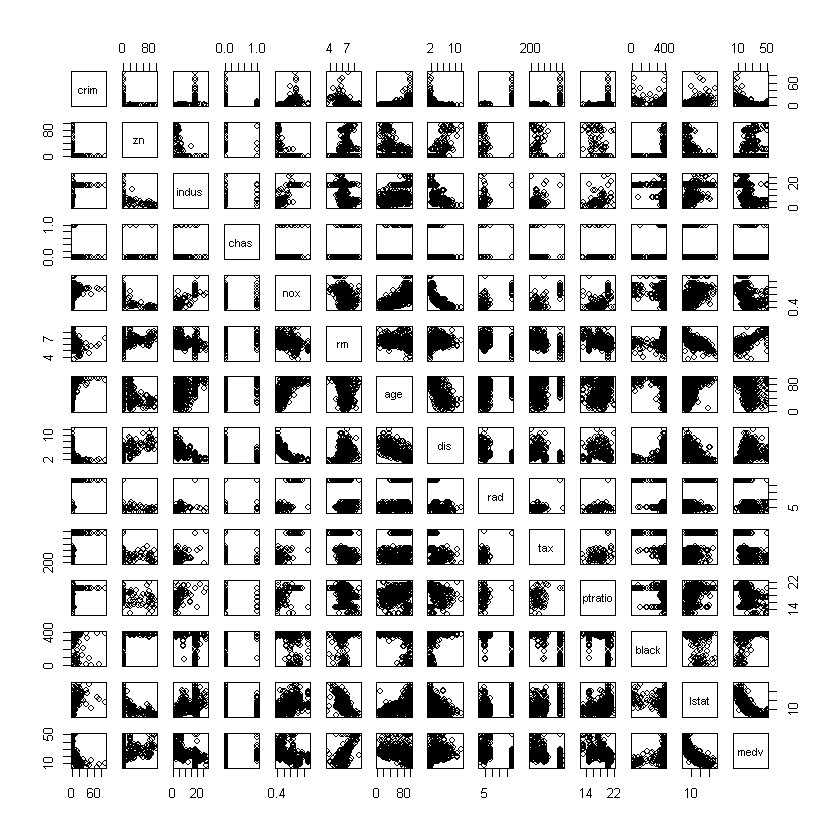

In [32]:
pairs(Boston)